🎯 URBAN HOTSPOT SCORING MODEL TRAINING
Starting comprehensive ML model training pipeline...
📁 LOADING URBAN HOTSPOT DATASET
✅ Dataset loaded successfully!
📊 Training data shape: (15000, 9)
📊 Analysis data shape: (15000, 10)

🔍 Dataset Info:
   Columns: ['AQI', 'PopulationDensity', 'DistHospital', 'DistSchool', 'DistAirport', 'DistBus', 'DistRailway', 'DistMall', 'HotspotScore']
   Data types: {'AQI': dtype('int64'), 'PopulationDensity': dtype('int64'), 'DistHospital': dtype('float64'), 'DistSchool': dtype('float64'), 'DistAirport': dtype('float64'), 'DistBus': dtype('float64'), 'DistRailway': dtype('float64'), 'DistMall': dtype('float64'), 'HotspotScore': dtype('float64')}
✅ No missing values found!

📊 Statistical Summary:
                AQI  PopulationDensity  DistHospital    DistSchool  \
count  15000.000000       15000.000000  15000.000000  15000.000000   
mean     117.791733        9015.610600     12.447606      7.597613   
std       73.064667        8714.333593     13.687621     

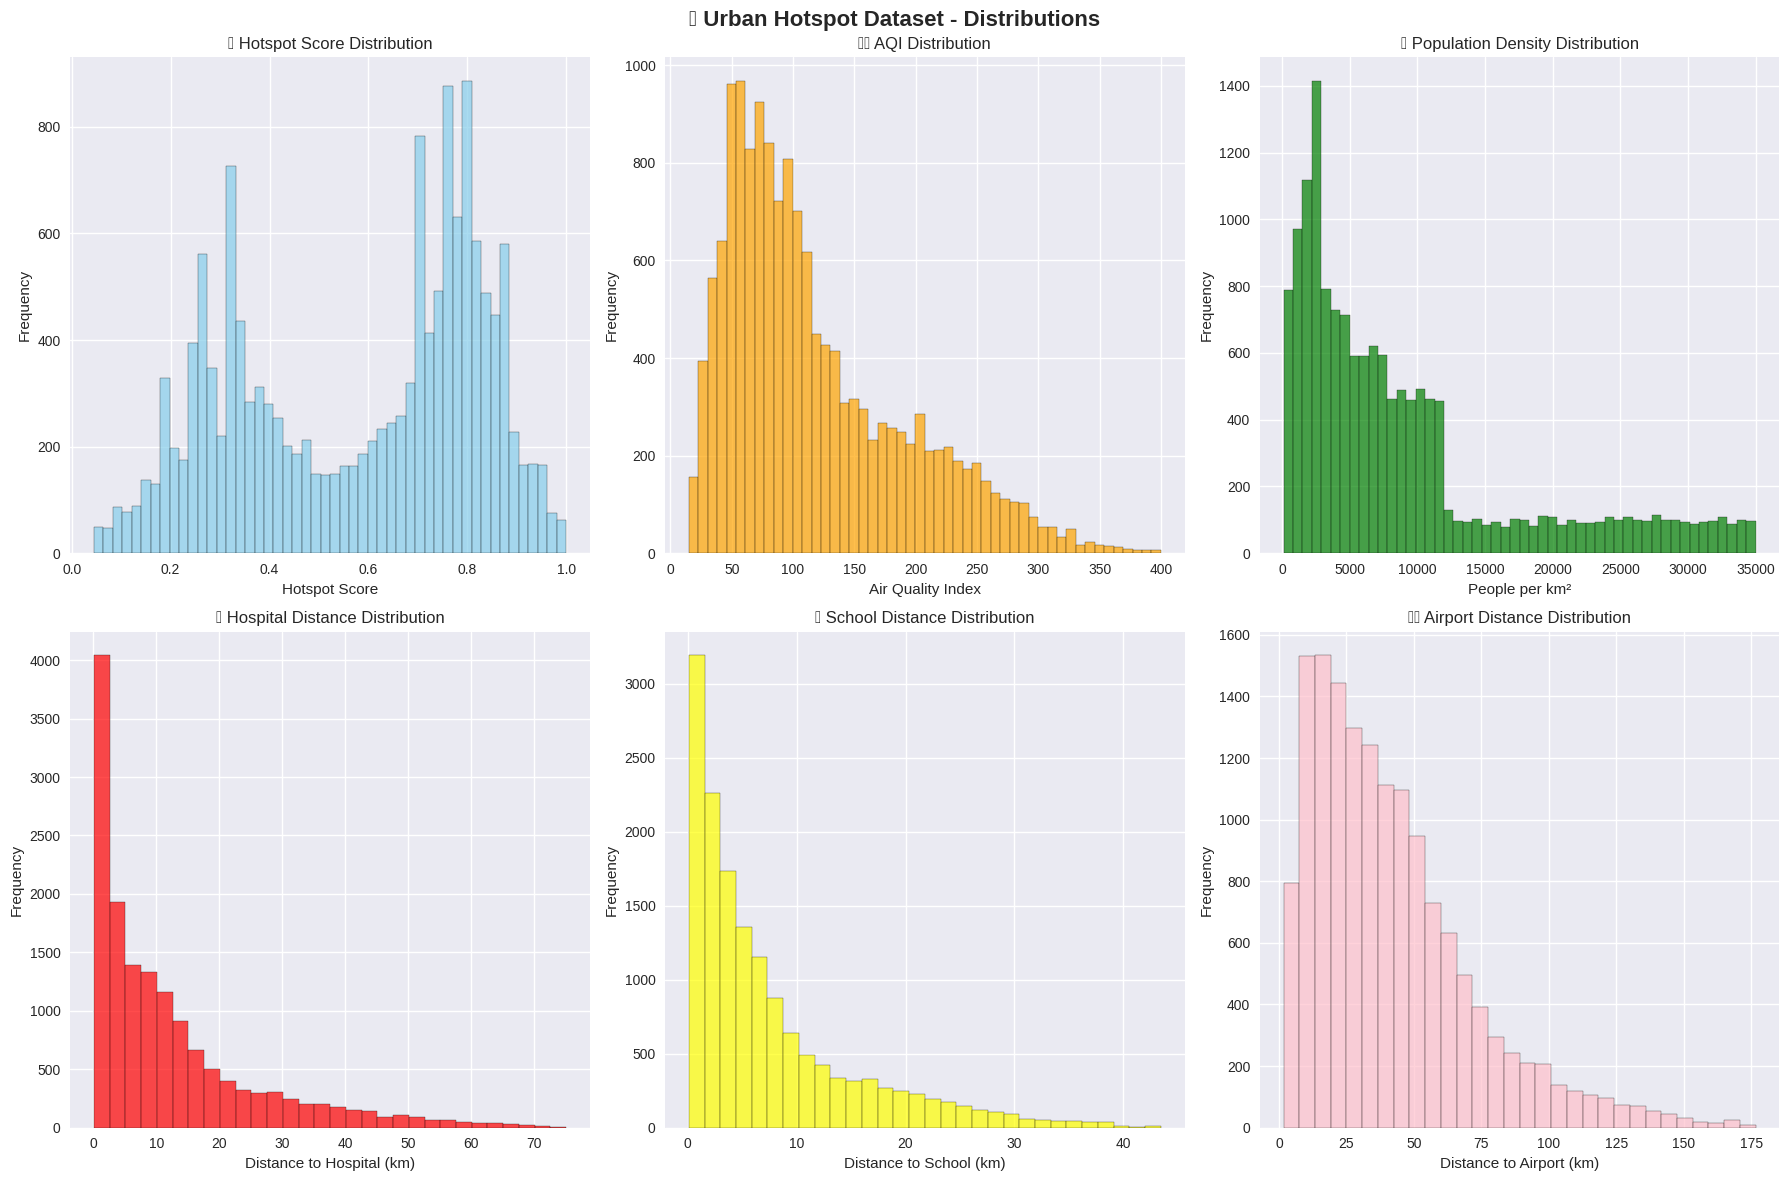

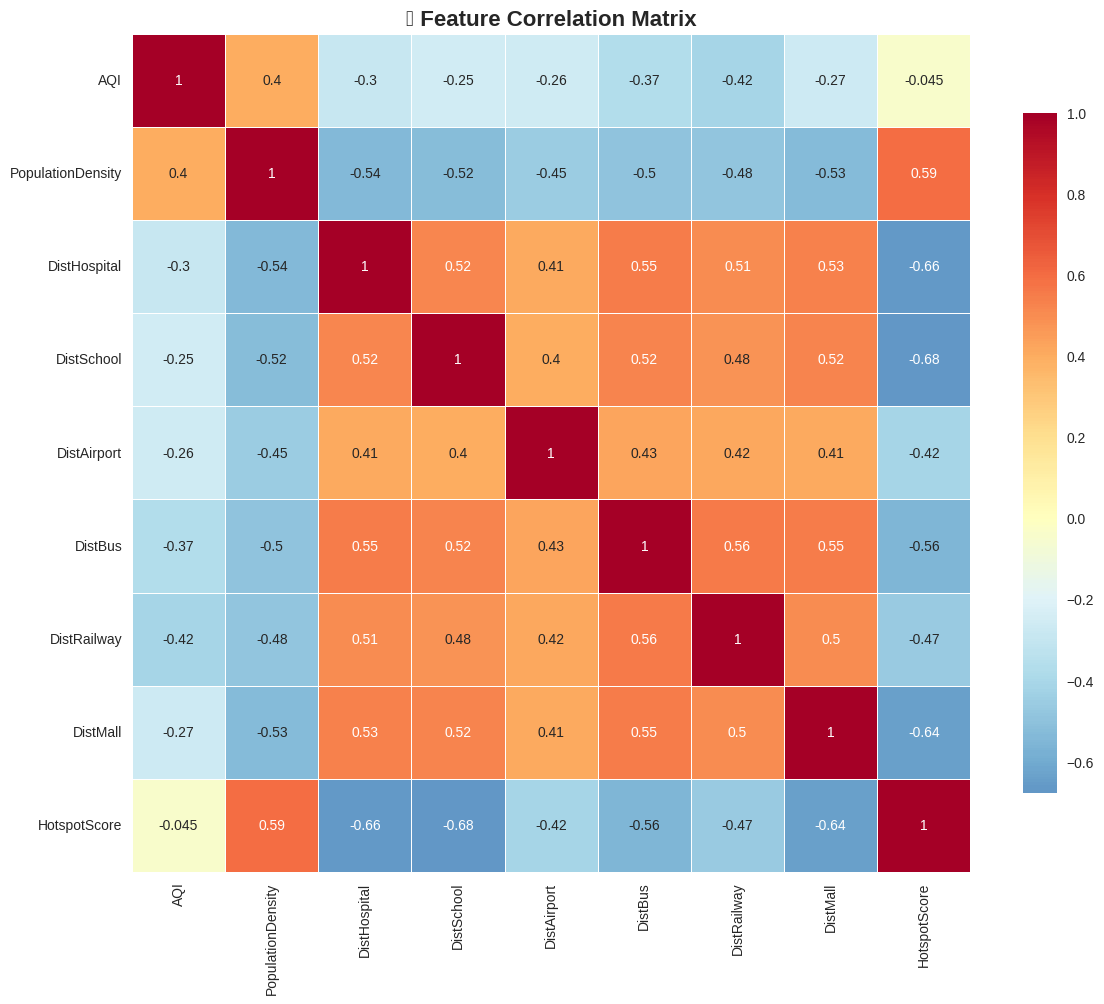


🎯 Strongest correlations with HotspotScore:
   DistSchool: 0.677
   DistHospital: 0.659
   DistMall: 0.641
   PopulationDensity: 0.595
   DistBus: 0.558
   DistRailway: 0.467
   DistAirport: 0.419
   AQI: 0.045


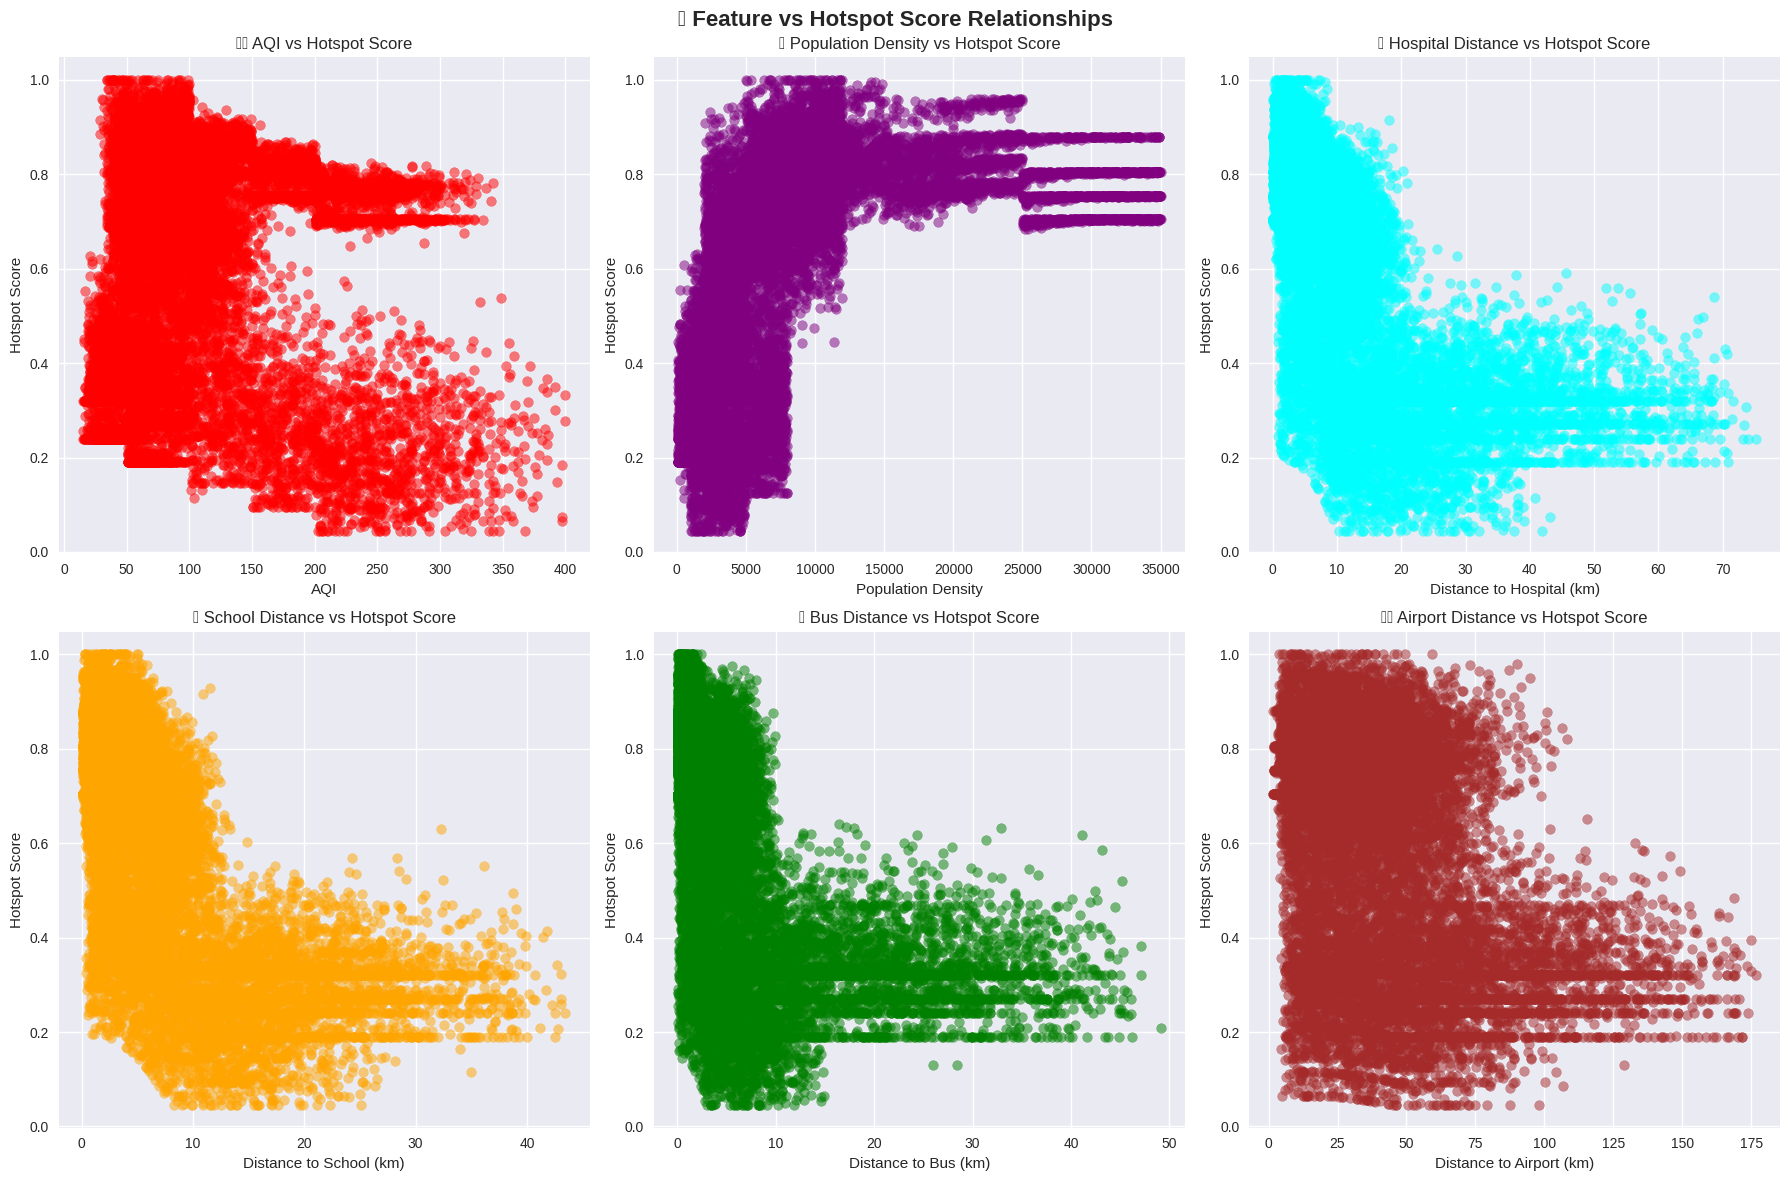

📊 Visualizations saved to 'plots/' directory!

🔧 DATA PREPROCESSING
🎯 Features: ['AQI', 'PopulationDensity', 'DistHospital', 'DistSchool', 'DistAirport', 'DistBus', 'DistRailway', 'DistMall']
🎯 Target: HotspotScore

📊 Feature matrix shape: (15000, 8)
📊 Target vector shape: (15000,)

📈 Target statistics:
   Min: 0.0450
   Max: 1.0000
   Mean: 0.5822
   Std: 0.2448

🔄 Splitting data into train/test sets...
✅ Data split complete!
   Training set: 12000 samples
   Testing set: 3000 samples
   Training ratio: 80.0%
   Testing ratio: 20.0%

⚖️ Applying feature scaling...
✅ Feature scaling complete!

🤖 MODEL TRAINING AND COMPARISON
🔄 Training and comparing multiple models...

🔧 Training Linear Regression...
   ✅ Training R²: 0.7997
   ✅ Testing R²: 0.7989
   📊 CV R² Score: 0.7993 (±0.0013)
   📏 Test RMSE: 0.1086
   📏 Test MAE: 0.0875

🔧 Training Ridge Regression...
   ✅ Training R²: 0.7997
   ✅ Testing R²: 0.7989
   📊 CV R² Score: 0.7993 (±0.0013)
   📏 Test RMSE: 0.1086
   📏 Test MAE: 0.0875


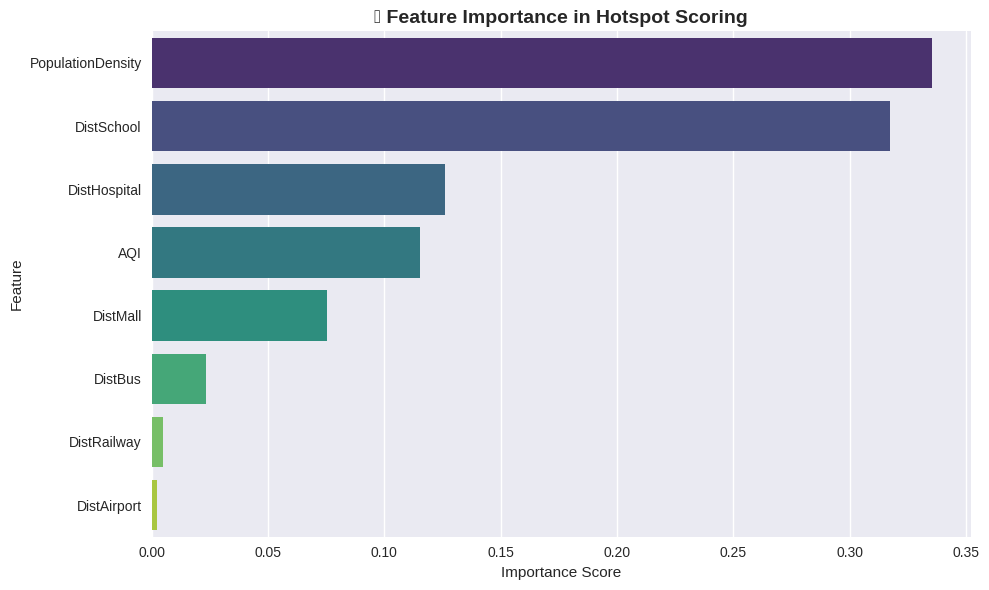

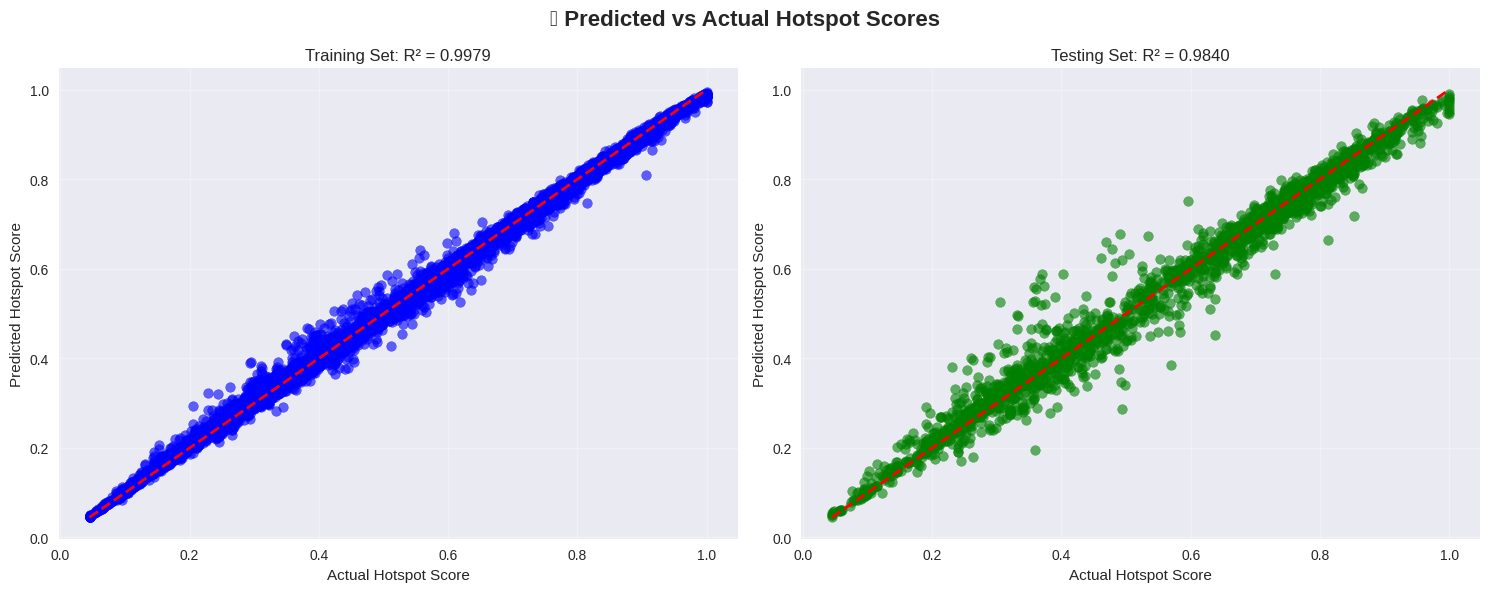


💾 SAVING TRAINED MODEL AND SCALER
✅ Model saved as: hotspot_model.pkl
✅ Scaler saved as: scaler.pkl
✅ Metadata saved as: model_metadata.pkl

📁 Generated Files:
   • hotspot_model.pkl (282213.3 KB)
   • scaler.pkl (0.8 KB)
   • model_metadata.pkl (0.5 KB)

🧪 TESTING SAVED MODEL
✅ Model, scaler, and metadata loaded successfully!

🎯 Testing with sample scenarios:

📍 Excellent Urban Location:
   Predicted Score: 0.9892 (98.9/100)
   Category: 🟢 Excellent

📍 Good Suburban Location:
   Predicted Score: 0.9839 (98.4/100)
   Category: 🟢 Excellent

📍 Poor Rural Location:
   Predicted Score: 0.1538 (15.4/100)
   Category: 🔴 Poor

✅ Model testing complete! The saved model is working correctly.

📋 TRAINING SUMMARY
🎯 Best Model: Random Forest
📊 Dataset Size: 15,000 samples
📈 Training Accuracy (R²): 0.9979
📈 Testing Accuracy (R²): 0.9840
📏 Testing RMSE: 0.0307
📏 Testing MAE: 0.0175
⚖️ Uses Feature Scaling: False

🚀 NEXT STEPS:
   1. Copy the .pkl files to your Backend/Model/ directory
   2. Restart

In [2]:
#!/usr/bin/env python3
"""
🎯 Urban Hotspot Scoring Model Training Script

This script trains a machine learning model to predict hotspot scores for vacant land based on:
- Air Quality Index (AQI)
- Population Density
- Distance to Amenities (Hospital, School, Airport, Bus, Railway, Mall)

The trained model will be used in the backend to provide real-time hotspot scoring.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
import warnings
import os
from pathlib import Path

warnings.filterwarnings('ignore')

def setup_plotting():
    """Set up matplotlib and seaborn for better plots"""
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['font.size'] = 10

def load_and_explore_data():
    """Load and explore the dataset"""
    print("=" * 80)
    print("📁 LOADING URBAN HOTSPOT DATASET")
    print("=" * 80)

    # Load datasets
    df = pd.read_csv('urban_hotspot_score.csv')
    df_with_areas = pd.read_csv('urban_hotspot_score_with_areas.csv')

    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Training data shape: {df.shape}")
    print(f"📊 Analysis data shape: {df_with_areas.shape}")

    # Basic info
    print(f"\n🔍 Dataset Info:")
    print(f"   Columns: {list(df.columns)}")
    print(f"   Data types: {df.dtypes.to_dict()}")

    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("✅ No missing values found!")
    else:
        print("⚠️ Missing values detected:")
        for col, missing in missing_values.items():
            if missing > 0:
                print(f"   {col}: {missing}")

    # Statistical summary
    print(f"\n📊 Statistical Summary:")
    print(df.describe())

    return df, df_with_areas

def create_visualizations(df, df_with_areas):
    """Create comprehensive visualizations"""
    print("\n" + "=" * 80)
    print("🎨 CREATING VISUALIZATIONS")
    print("=" * 80)

    # Create the plots directory if it doesn't exist
    plots_dir = Path("plots")
    plots_dir.mkdir(exist_ok=True)

    # 1. Distribution plots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('🎯 Urban Hotspot Dataset - Distributions', fontsize=16, fontweight='bold')

    # Hotspot Score Distribution
    axes[0, 0].hist(df['HotspotScore'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('🎯 Hotspot Score Distribution')
    axes[0, 0].set_xlabel('Hotspot Score')
    axes[0, 0].set_ylabel('Frequency')

    # AQI Distribution
    axes[0, 1].hist(df['AQI'], bins=50, alpha=0.7, color='orange', edgecolor='black')
    axes[0, 1].set_title('🌫️ AQI Distribution')
    axes[0, 1].set_xlabel('Air Quality Index')
    axes[0, 1].set_ylabel('Frequency')

    # Population Density Distribution
    axes[0, 2].hist(df['PopulationDensity'], bins=50, alpha=0.7, color='green', edgecolor='black')
    axes[0, 2].set_title('👥 Population Density Distribution')
    axes[0, 2].set_xlabel('People per km²')
    axes[0, 2].set_ylabel('Frequency')

    # Hospital Distance Distribution
    axes[1, 0].hist(df['DistHospital'], bins=30, alpha=0.7, color='red', edgecolor='black')
    axes[1, 0].set_title('🏥 Hospital Distance Distribution')
    axes[1, 0].set_xlabel('Distance to Hospital (km)')
    axes[1, 0].set_ylabel('Frequency')

    # School Distance Distribution
    axes[1, 1].hist(df['DistSchool'], bins=30, alpha=0.7, color='yellow', edgecolor='black')
    axes[1, 1].set_title('🏫 School Distance Distribution')
    axes[1, 1].set_xlabel('Distance to School (km)')
    axes[1, 1].set_ylabel('Frequency')

    # Airport Distance Distribution
    axes[1, 2].hist(df['DistAirport'], bins=30, alpha=0.7, color='pink', edgecolor='black')
    axes[1, 2].set_title('✈️ Airport Distance Distribution')
    axes[1, 2].set_xlabel('Distance to Airport (km)')
    axes[1, 2].set_ylabel('Frequency')

    plt.tight_layout()
    plt.savefig(plots_dir / 'distributions.png', dpi=150, bbox_inches='tight')
    plt.show()

    # 2. Correlation heatmap
    plt.figure(figsize=(12, 10))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('🔗 Feature Correlation Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(plots_dir / 'correlation_matrix.png', dpi=150, bbox_inches='tight')
    plt.show()

    # Print strongest correlations with HotspotScore
    print("\n🎯 Strongest correlations with HotspotScore:")
    hotspot_corr = correlation_matrix['HotspotScore'].abs().sort_values(ascending=False)
    for feature, corr in hotspot_corr.items():
        if feature != 'HotspotScore':
            print(f"   {feature}: {corr:.3f}")

    # 3. Scatter plots showing relationships
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('🎯 Feature vs Hotspot Score Relationships', fontsize=16, fontweight='bold')

    # AQI vs Hotspot Score
    axes[0, 0].scatter(df['AQI'], df['HotspotScore'], alpha=0.5, color='red')
    axes[0, 0].set_title('🌫️ AQI vs Hotspot Score')
    axes[0, 0].set_xlabel('AQI')
    axes[0, 0].set_ylabel('Hotspot Score')

    # Population Density vs Hotspot Score
    axes[0, 1].scatter(df['PopulationDensity'], df['HotspotScore'], alpha=0.5, color='purple')
    axes[0, 1].set_title('👥 Population Density vs Hotspot Score')
    axes[0, 1].set_xlabel('Population Density')
    axes[0, 1].set_ylabel('Hotspot Score')

    # Hospital Distance vs Hotspot Score
    axes[0, 2].scatter(df['DistHospital'], df['HotspotScore'], alpha=0.5, color='cyan')
    axes[0, 2].set_title('🏥 Hospital Distance vs Hotspot Score')
    axes[0, 2].set_xlabel('Distance to Hospital (km)')
    axes[0, 2].set_ylabel('Hotspot Score')

    # School Distance vs Hotspot Score
    axes[1, 0].scatter(df['DistSchool'], df['HotspotScore'], alpha=0.5, color='orange')
    axes[1, 0].set_title('🏫 School Distance vs Hotspot Score')
    axes[1, 0].set_xlabel('Distance to School (km)')
    axes[1, 0].set_ylabel('Hotspot Score')

    # Bus Distance vs Hotspot Score
    axes[1, 1].scatter(df['DistBus'], df['HotspotScore'], alpha=0.5, color='green')
    axes[1, 1].set_title('🚌 Bus Distance vs Hotspot Score')
    axes[1, 1].set_xlabel('Distance to Bus (km)')
    axes[1, 1].set_ylabel('Hotspot Score')

    # Airport Distance vs Hotspot Score
    axes[1, 2].scatter(df['DistAirport'], df['HotspotScore'], alpha=0.5, color='brown')
    axes[1, 2].set_title('✈️ Airport Distance vs Hotspot Score')
    axes[1, 2].set_xlabel('Distance to Airport (km)')
    axes[1, 2].set_ylabel('Hotspot Score')

    plt.tight_layout()
    plt.savefig(plots_dir / 'relationships.png', dpi=150, bbox_inches='tight')
    plt.show()

    print("📊 Visualizations saved to 'plots/' directory!")

    return correlation_matrix

def prepare_data(df):
    """Prepare data for machine learning"""
    print("\n" + "=" * 80)
    print("🔧 DATA PREPROCESSING")
    print("=" * 80)

    # Define features and target
    feature_columns = [
        'AQI', 'PopulationDensity', 'DistHospital', 'DistSchool',
        'DistAirport', 'DistBus', 'DistRailway', 'DistMall'
    ]
    target_column = 'HotspotScore'

    print(f"🎯 Features: {feature_columns}")
    print(f"🎯 Target: {target_column}")

    # Prepare feature matrix and target vector
    X = df[feature_columns].copy()
    y = df[target_column].copy()

    print(f"\n📊 Feature matrix shape: {X.shape}")
    print(f"📊 Target vector shape: {y.shape}")

    print(f"\n📈 Target statistics:")
    print(f"   Min: {y.min():.4f}")
    print(f"   Max: {y.max():.4f}")
    print(f"   Mean: {y.mean():.4f}")
    print(f"   Std: {y.std():.4f}")

    # Split the data
    print(f"\n🔄 Splitting data into train/test sets...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"✅ Data split complete!")
    print(f"   Training set: {X_train.shape[0]} samples")
    print(f"   Testing set: {X_test.shape[0]} samples")
    print(f"   Training ratio: {X_train.shape[0] / len(X) * 100:.1f}%")
    print(f"   Testing ratio: {X_test.shape[0] / len(X) * 100:.1f}%")

    # Feature scaling
    print(f"\n⚖️ Applying feature scaling...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"✅ Feature scaling complete!")

    return X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler, feature_columns

def train_and_compare_models(X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled):
    """Train and compare multiple models"""
    print("\n" + "=" * 80)
    print("🤖 MODEL TRAINING AND COMPARISON")
    print("=" * 80)

    # Define models to compare
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.01),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'Support Vector Regression': SVR(kernel='rbf', C=1.0)
    }

    print("🔄 Training and comparing multiple models...")

    model_results = {}

    for name, model in models.items():
        print(f"\n🔧 Training {name}...")

        # Use scaled features for models that benefit from scaling
        if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Support Vector Regression']:
            X_train_model = X_train_scaled
            X_test_model = X_test_scaled
        else:
            X_train_model = X_train
            X_test_model = X_test

        # Train the model
        model.fit(X_train_model, y_train)

        # Make predictions
        y_pred_train = model.predict(X_train_model)
        y_pred_test = model.predict(X_test_model)

        # Calculate metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)

        # Cross-validation score
        try:
            cv_scores = cross_val_score(model, X_train_model, y_train, cv=5, scoring='r2')
            cv_mean = cv_scores.mean()
            cv_std = cv_scores.std()
        except:
            cv_mean = test_r2
            cv_std = 0.0

        # Store results
        model_results[name] = {
            'model': model,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'cv_mean': cv_mean,
            'cv_std': cv_std,
            'uses_scaling': name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Support Vector Regression']
        }

        print(f"   ✅ Training R²: {train_r2:.4f}")
        print(f"   ✅ Testing R²: {test_r2:.4f}")
        print(f"   📊 CV R² Score: {cv_mean:.4f} (±{cv_std:.4f})")
        print(f"   📏 Test RMSE: {test_rmse:.4f}")
        print(f"   📏 Test MAE: {test_mae:.4f}")

    # Create comparison table
    print(f"\n📊 MODEL PERFORMANCE COMPARISON:")
    print("=" * 100)
    print(f"{'Model':<25} {'Train R²':<10} {'Test R²':<10} {'CV R² Mean':<12} {'Test RMSE':<10} {'Test MAE':<10}")
    print("-" * 100)

    # Sort by test R² score
    sorted_models = sorted(model_results.items(), key=lambda x: x[1]['test_r2'], reverse=True)

    for name, results in sorted_models:
        print(f"{name:<25} {results['train_r2']:<10.4f} {results['test_r2']:<10.4f} "
              f"{results['cv_mean']:<12.4f} {results['test_rmse']:<10.4f} {results['test_mae']:<10.4f}")

    # Find the best model
    best_model_name = sorted_models[0][0]
    best_model_info = sorted_models[0][1]

    print(f"\n🏆 BEST MODEL: {best_model_name}")
    print(f"   📊 Test R² Score: {best_model_info['test_r2']:.4f}")
    print(f"   📏 Test RMSE: {best_model_info['test_rmse']:.4f}")
    print(f"   📏 Test MAE: {best_model_info['test_mae']:.4f}")

    return model_results, best_model_name, best_model_info

def hyperparameter_tuning(best_model_name, best_model_info, X_train, X_train_scaled, y_train):
    """Perform hyperparameter tuning for the best model"""
    print(f"\n" + "=" * 80)
    print(f"🔧 HYPERPARAMETER TUNING FOR {best_model_name}")
    print("=" * 80)

    if best_model_name == 'Random Forest':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        base_model = RandomForestRegressor(random_state=42)
        X_tune = X_train

    elif best_model_name == 'Gradient Boosting':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.05, 0.1, 0.15],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 0.9, 1.0]
        }
        base_model = GradientBoostingRegressor(random_state=42)
        X_tune = X_train

    elif best_model_name == 'Ridge Regression':
        param_grid = {
            'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
        }
        base_model = Ridge()
        X_tune = X_train_scaled

    elif best_model_name == 'Support Vector Regression':
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
            'kernel': ['rbf', 'poly']
        }
        base_model = SVR()
        X_tune = X_train_scaled

    else:
        # For Linear and Lasso, use the original model
        print(f"   Using original {best_model_name} without additional tuning.")
        final_model = best_model_info['model']
        return final_model

    # Perform grid search
    print(f"   🔍 Searching through parameter combinations...")

    try:
        grid_search = GridSearchCV(
            base_model,
            param_grid,
            cv=5,
            scoring='r2',
            n_jobs=-1,
            verbose=0
        )

        grid_search.fit(X_tune, y_train)

        final_model = grid_search.best_estimator_

        print(f"✅ Hyperparameter tuning complete!")
        print(f"   🏆 Best parameters: {grid_search.best_params_}")
        print(f"   📊 Best CV score: {grid_search.best_score_:.4f}")

    except Exception as e:
        print(f"⚠️ Hyperparameter tuning failed: {e}")
        print(f"   Using original model without tuning.")
        final_model = best_model_info['model']

    return final_model

def evaluate_final_model(final_model, best_model_info, X_train, X_test, y_train, y_test,
                        X_train_scaled, X_test_scaled, feature_columns):
    """Evaluate the final tuned model"""
    print(f"\n" + "=" * 80)
    print("📊 FINAL MODEL EVALUATION")
    print("=" * 80)

    # Determine which features to use
    if best_model_info['uses_scaling']:
        X_train_final = X_train_scaled
        X_test_final = X_test_scaled
    else:
        X_train_final = X_train
        X_test_final = X_test

    # Make predictions
    y_pred_train_final = final_model.predict(X_train_final)
    y_pred_test_final = final_model.predict(X_test_final)

    # Calculate final metrics
    final_train_r2 = r2_score(y_train, y_pred_train_final)
    final_test_r2 = r2_score(y_test, y_pred_test_final)
    final_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_final))
    final_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_final))
    final_train_mae = mean_absolute_error(y_train, y_pred_train_final)
    final_test_mae = mean_absolute_error(y_test, y_pred_test_final)

    print(f"📊 Training R²: {final_train_r2:.4f}")
    print(f"📊 Testing R²: {final_test_r2:.4f}")
    print(f"📏 Training RMSE: {final_train_rmse:.4f}")
    print(f"📏 Testing RMSE: {final_test_rmse:.4f}")
    print(f"📏 Training MAE: {final_train_mae:.4f}")
    print(f"📏 Testing MAE: {final_test_mae:.4f}")

    # Check for overfitting
    overfitting_check = final_train_r2 - final_test_r2
    if overfitting_check > 0.1:
        print(f"⚠️ Potential overfitting detected (difference: {overfitting_check:.4f})")
    else:
        print(f"✅ Good generalization (difference: {overfitting_check:.4f})")

    # Feature importance (if available)
    if hasattr(final_model, 'feature_importances_'):
        print(f"\n🎯 Feature Importance:")
        feature_importance = pd.DataFrame({
            'Feature': feature_columns,
            'Importance': final_model.feature_importances_
        }).sort_values('Importance', ascending=False)

        for _, row in feature_importance.iterrows():
            print(f"   {row['Feature']}: {row['Importance']:.4f}")

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
        plt.title('🎯 Feature Importance in Hotspot Scoring', fontsize=14, fontweight='bold')
        plt.xlabel('Importance Score')
        plt.tight_layout()
        plt.savefig('plots/feature_importance.png', dpi=150, bbox_inches='tight')
        plt.show()

    elif hasattr(final_model, 'coef_'):
        print(f"\n🎯 Feature Coefficients:")
        feature_coef = pd.DataFrame({
            'Feature': feature_columns,
            'Coefficient': final_model.coef_
        }).sort_values('Coefficient', key=abs, ascending=False)

        for _, row in feature_coef.iterrows():
            print(f"   {row['Feature']}: {row['Coefficient']:.4f}")

    # Prediction vs Actual plots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Training set
    axes[0].scatter(y_train, y_pred_train_final, alpha=0.6, color='blue')
    axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    axes[0].set_xlabel('Actual Hotspot Score')
    axes[0].set_ylabel('Predicted Hotspot Score')
    axes[0].set_title(f'Training Set: R² = {final_train_r2:.4f}')
    axes[0].grid(True, alpha=0.3)

    # Testing set
    axes[1].scatter(y_test, y_pred_test_final, alpha=0.6, color='green')
    axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[1].set_xlabel('Actual Hotspot Score')
    axes[1].set_ylabel('Predicted Hotspot Score')
    axes[1].set_title(f'Testing Set: R² = {final_test_r2:.4f}')
    axes[1].grid(True, alpha=0.3)

    plt.suptitle('🎯 Predicted vs Actual Hotspot Scores', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('plots/prediction_plots.png', dpi=150, bbox_inches='tight')
    plt.show()

    return final_train_r2, final_test_r2, final_train_rmse, final_test_rmse, final_train_mae, final_test_mae

def save_model_and_scaler(final_model, scaler, feature_columns, best_model_name, best_model_info,
                         final_train_r2, final_test_r2, final_train_rmse, final_test_rmse,
                         final_train_mae, final_test_mae, X_train, X_test):
    """Save the trained model and scaler"""
    print(f"\n" + "=" * 80)
    print("💾 SAVING TRAINED MODEL AND SCALER")
    print("=" * 80)

    # Save the model
    model_filename = 'hotspot_model.pkl'
    with open(model_filename, 'wb') as f:
        pickle.dump(final_model, f)
    print(f"✅ Model saved as: {model_filename}")

    # Save the scaler
    scaler_filename = 'scaler.pkl'
    with open(scaler_filename, 'wb') as f:
        pickle.dump(scaler, f)
    print(f"✅ Scaler saved as: {scaler_filename}")

    # Save model metadata
    model_metadata = {
        'model_type': best_model_name,
        'feature_columns': feature_columns,
        'target_column': 'HotspotScore',
        'uses_scaling': best_model_info['uses_scaling'],
        'train_r2': final_train_r2,
        'test_r2': final_test_r2,
        'train_rmse': final_train_rmse,
        'test_rmse': final_test_rmse,
        'train_mae': final_train_mae,
        'test_mae': final_test_mae,
        'training_samples': len(X_train),
        'testing_samples': len(X_test)
    }

    metadata_filename = 'model_metadata.pkl'
    with open(metadata_filename, 'wb') as f:
        pickle.dump(model_metadata, f)
    print(f"✅ Metadata saved as: {metadata_filename}")

    # File sizes
    model_size = os.path.getsize(model_filename) / 1024
    scaler_size = os.path.getsize(scaler_filename) / 1024
    metadata_size = os.path.getsize(metadata_filename) / 1024

    print(f"\n📁 Generated Files:")
    print(f"   • {model_filename} ({model_size:.1f} KB)")
    print(f"   • {scaler_filename} ({scaler_size:.1f} KB)")
    print(f"   • {metadata_filename} ({metadata_size:.1f} KB)")

    return model_filename, scaler_filename, metadata_filename, model_metadata

def test_saved_model(model_filename, scaler_filename, metadata_filename):
    """Test the saved model with sample predictions"""
    print(f"\n" + "=" * 80)
    print("🧪 TESTING SAVED MODEL")
    print("=" * 80)

    # Load the saved model and scaler
    with open(model_filename, 'rb') as f:
        loaded_model = pickle.load(f)

    with open(scaler_filename, 'rb') as f:
        loaded_scaler = pickle.load(f)

    with open(metadata_filename, 'rb') as f:
        loaded_metadata = pickle.load(f)

    print("✅ Model, scaler, and metadata loaded successfully!")

    # Test with sample scenarios
    print(f"\n🎯 Testing with sample scenarios:")

    test_scenarios = [
        {
            'name': 'Excellent Urban Location',
            'AQI': 45, 'PopulationDensity': 12000, 'DistHospital': 1.5, 'DistSchool': 0.8,
            'DistAirport': 20, 'DistBus': 0.3, 'DistRailway': 2.0, 'DistMall': 1.2
        },
        {
            'name': 'Good Suburban Location',
            'AQI': 75, 'PopulationDensity': 8000, 'DistHospital': 3.0, 'DistSchool': 2.0,
            'DistAirport': 25, 'DistBus': 1.0, 'DistRailway': 5.0, 'DistMall': 3.0
        },
        {
            'name': 'Poor Rural Location',
            'AQI': 150, 'PopulationDensity': 1500, 'DistHospital': 15.0, 'DistSchool': 12.0,
            'DistAirport': 45, 'DistBus': 8.0, 'DistRailway': 20.0, 'DistMall': 18.0
        }
    ]

    for scenario in test_scenarios:
        # Prepare features
        features = np.array([[
            scenario['AQI'], scenario['PopulationDensity'], scenario['DistHospital'],
            scenario['DistSchool'], scenario['DistAirport'], scenario['DistBus'],
            scenario['DistRailway'], scenario['DistMall']
        ]])

        # Scale if needed
        if loaded_metadata['uses_scaling']:
            features_scaled = loaded_scaler.transform(features)
            prediction = loaded_model.predict(features_scaled)[0]
        else:
            prediction = loaded_model.predict(features)[0]

        # Convert to 0-100 scale for display
        score_100 = prediction * 100

        # Categorize the score
        if score_100 >= 80:
            category = "🟢 Excellent"
        elif score_100 >= 70:
            category = "🟢 Very Good"
        elif score_100 >= 60:
            category = "🟡 Good"
        elif score_100 >= 50:
            category = "🟠 Fair"
        else:
            category = "🔴 Poor"

        print(f"\n📍 {scenario['name']}:")
        print(f"   Predicted Score: {prediction:.4f} ({score_100:.1f}/100)")
        print(f"   Category: {category}")

    print(f"\n✅ Model testing complete! The saved model is working correctly.")

    return loaded_metadata

def print_summary(loaded_metadata):
    """Print training summary and next steps"""
    print(f"\n" + "=" * 80)
    print("📋 TRAINING SUMMARY")
    print("=" * 80)
    print(f"🎯 Best Model: {loaded_metadata['model_type']}")
    print(f"📊 Dataset Size: {loaded_metadata['training_samples'] + loaded_metadata['testing_samples']:,} samples")
    print(f"📈 Training Accuracy (R²): {loaded_metadata['train_r2']:.4f}")
    print(f"📈 Testing Accuracy (R²): {loaded_metadata['test_r2']:.4f}")
    print(f"📏 Testing RMSE: {loaded_metadata['test_rmse']:.4f}")
    print(f"📏 Testing MAE: {loaded_metadata['test_mae']:.4f}")
    print(f"⚖️ Uses Feature Scaling: {loaded_metadata['uses_scaling']}")

    print(f"\n🚀 NEXT STEPS:")
    print(f"   1. Copy the .pkl files to your Backend/Model/ directory")
    print(f"   2. Restart your backend server")
    print(f"   3. Test the Hotspots tab in your frontend")
    print(f"   4. The system will now use ML-powered hotspot scoring!")

    print(f"\n🎉 Your Urban Hotspot Scoring System is ready for deployment!")
    print("=" * 80)

def main():
    """Main training pipeline"""
    print("🎯 URBAN HOTSPOT SCORING MODEL TRAINING")
    print("=" * 80)
    print("Starting comprehensive ML model training pipeline...")
    print("=" * 80)

    # Setup
    setup_plotting()

    # Load and explore data
    df, df_with_areas = load_and_explore_data()

    # Create visualizations
    correlation_matrix = create_visualizations(df, df_with_areas)

    # Prepare data
    X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler, feature_columns = prepare_data(df)

    # Train and compare models
    model_results, best_model_name, best_model_info = train_and_compare_models(
        X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled
    )

    # Hyperparameter tuning
    final_model = hyperparameter_tuning(best_model_name, best_model_info, X_train, X_train_scaled, y_train)

    # Final evaluation
    final_train_r2, final_test_r2, final_train_rmse, final_test_rmse, final_train_mae, final_test_mae = evaluate_final_model(
        final_model, best_model_info, X_train, X_test, y_train, y_test,
        X_train_scaled, X_test_scaled, feature_columns
    )

    # Save model and scaler
    model_filename, scaler_filename, metadata_filename, model_metadata = save_model_and_scaler(
        final_model, scaler, feature_columns, best_model_name, best_model_info,
        final_train_r2, final_test_r2, final_train_rmse, final_test_rmse,
        final_train_mae, final_test_mae, X_train, X_test
    )

    # Test saved model
    loaded_metadata = test_saved_model(model_filename, scaler_filename, metadata_filename)

    # Print summary
    print_summary(loaded_metadata)

if __name__ == "__main__":
    main()
